## Import dependencies

In [1]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import *
from keras.callbacks import EarlyStopping
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from glob import glob
%matplotlib inline

Using TensorFlow backend.


## Define Model

In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(124, 124, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# load trained weights
model.load_weights('weights.h5')

## Check model performance on random images

True


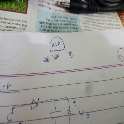

In [40]:
img_path = random.choice(glob('WhatsApp Images/*'))
img = load_img(img_path, target_size=(124, 124, 3)) # this is a PIL image
x = img_to_array(img) / 255.0
y = model.predict(np.expand_dims(x, axis=0))
print(np.squeeze(y) > 0.5)
img

In [86]:
def predict(file_path):
    '''
    predict whether file is a notes image
    '''
    img = load_img(file_path, target_size=(124, 124, 3))
    x = img_to_array(img) / 255. 
    y = model.predict(np.expand_dims(x, axis=0))
    return np.squeeze(y) > 0.5

In [93]:
# create 'notes' folder to store extracted notes images
if not os.path.exists('notes'):
    os.mkdir('notes')

In [131]:
# extract notes from WhatsApp Images folder

files = glob('WhatsApp Images/*.*') + glob('WhatsApp Images/Sent/*.*')

for file_path in files:
    if predict(file_path): # check if the file is one of the notes
        file_name = file_path.split('/')[-1] # get file name
        os.rename(file_path, 'notes/' + file_name) # move the file to 'notes' folder